# 1-D Fourier Transforms

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First we plot a simple sine wave in the time domain

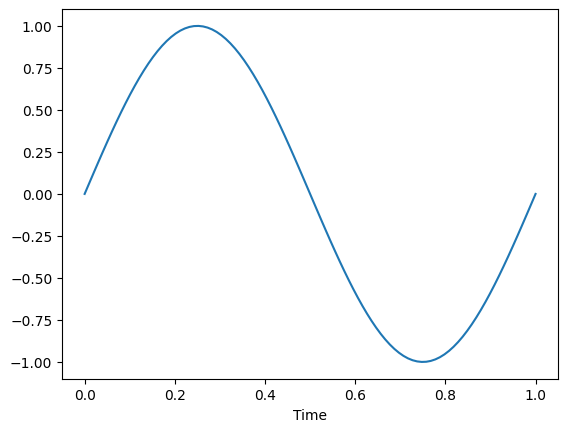

In [18]:
def signal(time: np.ndarray, A: float, f: float, n: int) -> np.ndarray:
    """
    A: Amplitude of the signal
    f: cycles per unit time. 1/f represents the time it takes for 1 cycle
    n: Number of samples 
    """
    return np.sin(2 * np.pi * f * time)

def plot_signal(time: np.ndarray, signal_val: np.ndarray):
    fig = plt.figure()
    plt.plot(time, signal_val)
    plt.xlabel("Time")
    plt.show()

num_samples = 100
f = 1
time = np.linspace(0, 1, num_samples)
signal_vals = signal(time, 10, f, num_samples)
plot_signal(time, signal_vals)

Below, we compute the Fast-Fourier Transform of our signal, identify the constituent positive and negative frequencies, and plot the corresponding magnitude of the frequencies present in our signal.

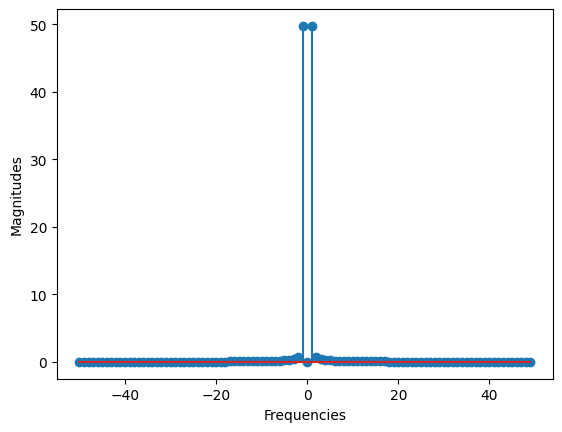

In [24]:
spacing = (time[-1] - time[0]) / num_samples
f_magnitudes = np.fft.fft(signal_vals, num_samples)
f_values = np.fft.fftfreq(num_samples, spacing)

fig = plt.figure()
plt.stem(f_values, np.abs(f_magnitudes))
plt.xlabel("Frequencies")
plt.ylabel("Magnitudes")
plt.show()

# 2D Fourier Transforms

First we construct a static, sinusodial grating

Then, we compute the 2D Fast-Fourier Transform of it

Finally, we plot

Q: Why do we need to do an fftshift?
Q: How does one interpret a 2D FFT plot? What am I looking at?


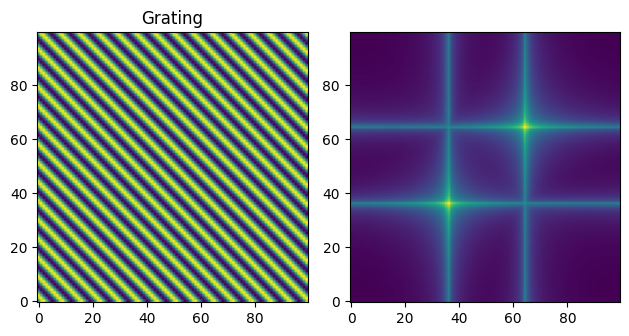

In [48]:
def sinusodial_grating(A: float, f: float, theta: float, phase: float) -> np.ndarray:
    x = np.linspace(0, 10, 100)
    y = np.linspace(0, 10, 100)

    X, Y = np.meshgrid(x, y)
    grating = A * np.sin(2 * np.pi * f * (np.cos(theta)*X + np.sin(theta)*Y) + phase)
    return grating

grating = sinusodial_grating(1.0, 2.0, np.pi/4, 0.0)

F = np.fft.fft2(grating)
F_shifted = np.fft.fftshift(F)
log_mag = np.log(1 + np.abs(F_shifted))

fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(grating, origin='lower')
plt.title("Grating")

plt.subplot(1, 2, 2)
plt.imshow(log_mag, origin="lower")
plt.tight_layout()
plt.show()
